In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df= pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [4]:
df['GENDER'] = df['GENDER'].map({'F':0,'M':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [5]:
df.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [6]:
df.drop_duplicates(inplace =True)


In [7]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
df.reset_index()

,index,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
272,280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
273,281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
274,282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [9]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split

In [10]:
data = df.iloc[:,:-1].values
x= scale(data)
y= df.iloc[:,-1].values


In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

<h1>KNeighborsClassifier</h1>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train)
knn_pred =knn.predict(x_test)

In [14]:
print('accuracy :', metrics.accuracy_score(y_test,knn_pred))
print('score test:',knn.score(x_test,y_test))
print('score train:',knn.score(x_train,y_train))

accuracy : 0.8392857142857143
score test: 0.8392857142857143
score train: 0.9090909090909091


In [15]:
from sklearn.metrics import auc ,roc_curve

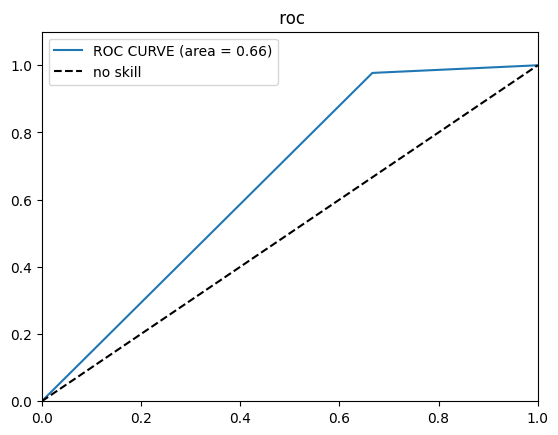

In [16]:
fbr , tpr , thresholds =roc_curve(y_test, knn_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)

plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0 , 1.1])
plt.title(' roc')
plt.legend()
plt.show()

In [17]:
knn_matrix = confusion_matrix (y_test,knn_pred)
print (classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.84      0.98      0.91        44

    accuracy                           0.84        56
   macro avg       0.82      0.66      0.69        56
weighted avg       0.83      0.84      0.81        56



In [18]:
knn_matrix

array([[ 4,  8],
       [ 1, 43]])

<h1>LogisticRegression</h1>

In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
lo = LogisticRegression()
lo.fit(x_train , y_train)
lo_pred =lo.predict(x_test)


In [21]:
print('accuracy :', metrics.accuracy_score(y_test,lo_pred))
print('score test:',lo.score(x_test,y_test))
print('score train:',lo.score(x_train,y_train))

accuracy : 0.9285714285714286
score test: 0.9285714285714286
score train: 0.9318181818181818


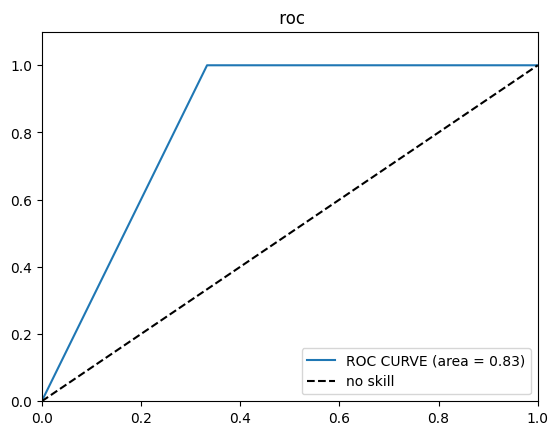

In [22]:
fbr , tpr , thresholds =roc_curve(y_test,lo_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)

plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.1])
plt.title(' roc')
plt.legend()
plt.show()

In [23]:
lo_matrix = confusion_matrix (y_test,lo_pred)
print (classification_report(y_test,lo_pred))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



In [24]:
lo_matrix

array([[ 8,  4],
       [ 0, 44]])

<h1>SVM</h1>

In [25]:
from sklearn.svm import SVC

In [26]:
sv = SVC(kernel='rbf')
sv.fit(x_train , y_train)
svm_pred = sv.predict(x_test)

In [27]:
print('accuracy :', metrics.accuracy_score(y_test,svm_pred))
print('score test:',sv.score(x_test,y_test))
print('score train:',sv.score(x_train,y_train))

accuracy : 0.8392857142857143
score test: 0.8392857142857143
score train: 0.9454545454545454


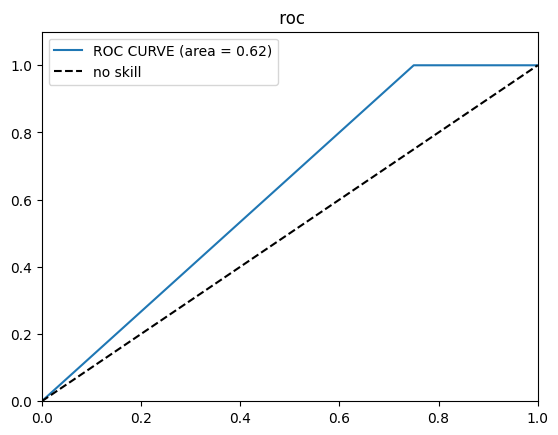

In [28]:
fbr , tpr , thresholds =roc_curve(y_test,svm_pred)
plt.figure()
roc_curbe=auc(fbr,tpr)

plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.1])
plt.title(' roc')
plt.legend()
plt.show()

In [29]:
knn_matrix = confusion_matrix (y_test,svm_pred)
print (classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.84      0.98      0.91        44

    accuracy                           0.84        56
   macro avg       0.82      0.66      0.69        56
weighted avg       0.83      0.84      0.81        56

